# Brainspan alignment

Goal: investigate how different DS filter levels influence alignment with Brainspan. Using RNAseq brainspan data

## Setup

In [1]:
# Import modules and R
import numpy as np, pandas as pd
from plotnine import *
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Import local code
import sys
sys.path.append('../code')
import pcaVersion
from processing_helpers import *
from analysis_helpers import *
from brainspan import *
%R source("../code/Rplots.R");
%R source("../code/brainPlots.R");

Attaching package: ‘lemon’



    %||%



    CoordCartesian, element_render




## Get brainspan RNAseq data

In [3]:
bs_dir = "../data/brainspan-data/gene_matrix_rnaseq/"
bs_exp, bs_col, bs_row = get_brainspan(bs_dir)

Define age groups

In [4]:
age_groups = get_age_groups()

## Explore brainspan

Expression matrix:

In [660]:
bs_exp.head()

1          2          3          4          5          6    \
0                                                                     
1  36.447128  24.251253  19.330479  27.668607  19.998231  14.680673   
2   0.044081   0.067338   0.000000   0.145466   0.185188   0.311180   
3  34.373239  20.765661  18.734947  22.366394  19.228431  11.020365   
4   4.379337   4.227521   2.551825   3.603764   2.948976   2.405183   
5   3.957119   3.520794   2.037805   3.487035   2.177235   0.999693   

         7          8          9          10         11         12   \
0                                                                     
1  27.548101  16.580183  44.587799  44.943915  41.084665  22.177874   
2   0.000000   0.000000   0.473831   0.181220   0.635343   0.049313   
3  25.394607  17.671327  32.903100  38.157569  29.371442  17.982009   
4   3.613642   2.573935   3.483817   3.609830   3.287066   3.602514   
5   3.481555   1.747568   3.741580   3.560650   2.804860   2.861844   

         13         14         15         16         17         18   \
0                                                                     
1  23.640053  43.194162  30.133433  26.391215  21.538118  26.532324   
2   0.006587   0.163946   0.086484   0.159348   0.025361   0.302944   
3  19.390473  26.140231  27.771254  22.094928  14.362518  15.690801   
4   3.308546   3.557031   3.135879   3.467244   3.821916   3.268701   
5   2.011409   3.774340   2.687870   3.047570   4.220291   3.919072   

         19         20         21         22         23         24   \
0                                                                     
1  25.019872  11.802118  13.984353  20.232053  26.919999  20.007297   
2   0.029515   0.000000   0.132173   0.028394   0.023062   0.079898   
3  15.141257   7.420219   8.543110  14.038752  14.280717  13.296702   
4   2.630279   1.724301   1.774821   2.816677   3.716031   3.329856   
5   3.288273   1.478052   1.236651   4.067904   4.634707   4.248107   

         25   ...       500       501        502        503       504  \
0             ...                                                       
1  16.403097  ...  2.229368  1.489437   3.777527   2.550667  1.666197   
2   0.000000  ...  0.041612  0.023867   0.000000   0.061325  0.026722   
3  16.467168  ...  9.849653  8.858737  15.085642  11.499898  9.597139   
4   2.612591  ...  3.171521  2.721177   2.595992   2.385437  2.600204   
5   2.916772  ...  1.027014  0.914700   1.086175   0.602042  0.860954   

        505        506       507        508        509        510        511  \
0                                                                              
1  2.201803   3.453165  1.547757   4.186659   3.516760   3.448635   2.953957   
2  0.024207   0.000000  0.000000   0.126478   0.051084   0.215720   0.116156   
3  8.240257  11.792959  6.229000  12.765258  24.054143  30.048822  18.553086   
4  2.322096   2.448782  2.115196   2.571508   2.834760   1.655831   1.582823   
5  0.972436   1.188076  0.538191   1.056677   1.224442   0.652520   0.507065   

         512        513        514        515        516        517  \
0                                                                     
1   2.316534   3.856406   5.018769   2.320932   1.781548   2.277359   
2   0.068092   0.183051   0.032619   0.758571   0.000000   0.061869   
3  16.235825  12.989003  26.069329  23.769167  20.142132  20.063257   
4   2.128537   1.818873   1.351824   1.593009   1.563377   1.648571   
5   0.545618   0.851459   0.782172   0.583488   0.797376   0.607141   

         518        519        520        521        522        523        524  
0                                                                               
1   1.832737   1.555696   2.081944   3.484685   4.816781   3.034464   3.082820  
2   0.026876   0.100691   0.140675   0.300576   0.126526   0.000000   0.424134  
3  16.575379  18.783516  21.631293  28.006120  28.731717  16.679597  28.866042  
4   2.231466   2.040326   2.161741   1.27

Column labels for each sample, from different donors:

In [661]:
bs_col.head()

column_num  donor_id   donor_name    age gender  structure_id  \
0           1     13058  H376.IIA.51  8 pcw      M         10268   
1           2     13058  H376.IIA.51  8 pcw      M         10291   
2           3     13058  H376.IIA.51  8 pcw      M         10361   
3           4     13058  H376.IIA.51  8 pcw      M         10550   
4           5     13058  H376.IIA.51  8 pcw      M         10243   

  structure_acronym                                     structure_name  
0               Ocx                                occipital neocortex  
1           M1C-S1C             primary motor-sensory cortex (samples)  
2               AMY                                 amygdaloid complex  
3               MGE                         medial ganglionic eminence  
4               STC  posterior (caudal) superior temporal cortex (a...

Row labels for each gene:

In [662]:
bs_row.head()

row_num  gene_id  ensembl_gene_id gene_symbol  entrez_id
0        1   7062.0  ENSG00000000003      TSPAN6     7105.0
1        2  40735.0  ENSG00000000005        TNMD    64102.0
2        3   8736.0  ENSG00000000419        DPM1     8813.0
3        4  36423.0  ENSG00000000457       SCYL3    57147.0
4        5  35021.0  ENSG00000000460    C1orf112    55732.0

Define age groups

In [663]:
bs_col = (bs_col 
          .assign(age_group = lambda x: x['age'].map(age_groups))
          .assign(age_group = lambda x: pd.Categorical(x['age_group'], ordered=True, categories=x['age_group'].unique()))
         )

Check how many donors we have in each age group (just for samples from DFC)

In [664]:
(bs_col
 .loc[lambda x: x['structure_acronym']=='DFC']
 .groupby(['age_group']).agg({'donor_id':'count'}).rename({'donor_id':'donor_count'},axis=1)
)

donor_count
age_group                  
8-12 pcw                  5
13-18 pcw                 7
19-24 pcw                 3
25-38 pcw                 2
Birth-5 months            2
6-18 months               2
19 months-5yrs            3
6-11 yrs                  3
12-19 yrs                 3
20-40 yrs                 5

Check full table of samples from each brain region x age group

In [665]:
pd.set_option('display.max_columns', 50)
(bs_col
 .pivot_table(values='column_num', index='structure_name', columns='age_group', aggfunc='count')
 .sort_values(list(bs_col['age_group'].cat.categories)[::-1], axis=0, ascending=False)
)

age_group                                           8-12 pcw  13-18 pcw  \
structure_name                                                            
posterior (caudal) superior temporal cortex (ar...         3          6   
cerebellar cortex                                          1          2   
inferolateral temporal cortex (area TEv, area 20)          4          5   
posteroventral (inferior) parietal cortex                  3          7   
ventrolateral prefrontal cortex                            4          7   
amygdaloid complex                                         5          6   
primary auditory cortex (core)                             3          7   
hippocampus (hippocampal formation)                        5          6   
orbital frontal cortex                                     5          6   
primary somatosensory cortex (area S1, areas 3,...         3          4   
primary motor cortex (area M1, area 4)                     3          4   
mediodorsal nucleus of thalamus                            0          5   
striatum                                                   3          7   
dorsolateral prefrontal cortex                             5          7   
primary visual cortex (striate cortex, area V1/17)         3          7   
anterior (rostral) cingulate (medial prefrontal...         4          7   
primary motor-sensory cortex (samples)                     2          2   
cerebellum                                                 1          2   
dorsal thalamus                                            5          0   
caudal ganglionic eminence                                 2          0   
lateral ganglionic eminence                                2          0   
medial ganglionic eminence                                 2          0   
occipital neocortex                                        2          0   
parietal neocortex                                         2          0   
upper (rostral) rhombic lip                                2          0   
temporal neocortex                                         1          0   

age_group                                           19-24 pcw  25-38 pcw  \
structure_name                                                             
posterior (caudal) superior temporal cortex (ar...          3          2   
cerebellar cortex                                           3          2   
inferolateral temporal cortex (area TEv, area 20)           3          1   
posteroventral (inferior) parietal cortex                   3          1   
ventrolateral prefrontal cortex                             3          2   
amygdaloid complex                                          2          1   
primary auditory cortex (core)                              2          2   
hippocampus (hippocampal formation)                         3          1   
orbital frontal cortex                                      2          1   
primary somatosensory cortex (area S1, areas 3,...          2          1   
primary motor cortex (area M1, area 4)                      2          1   
mediodorsal nucleus of thalamus                             2          1   
striatum                                                    3          1   
dorsolateral prefrontal cortex                              3          2   
primary visual cortex (striate cortex, area V1/17)          3          2   
anterior (rostral) cingulate (medial prefrontal...          3          1   
primary motor-sensory cortex (samples)                      1          0   
cerebellum                                                  0          0   
dorsal thalamus                                             0          0   
caudal ganglionic eminence                                  0          0   
lateral ganglionic eminence                                 0          0   
medial ganglionic eminence                                  0          0   
occipital neocortex                                         0          0   

## Map HCP regions to Brainspan

Map the BS regions to HCP 'cortex' (grouping of regions)

In [5]:
bs_hcp_map = {
    'primary visual cortex (striate cortex, area V1/17)': 'Primary_Visual',
    'posteroventral (inferior) parietal cortex': 'Inferior_Parietal',
    'primary somatosensory cortex (area S1, areas 3,1,2)': 'Somatosensory_and_Motor',
    'primary motor cortex (area M1, area 4)': 'Somatosensory_and_Motor',
    'dorsolateral prefrontal cortex': 'Dorsolateral_Prefrontal',
    'ventrolateral prefrontal cortex': 'Inferior_Frontal',    
    'anterior (rostral) cingulate (medial prefrontal) cortex': 'Anterior_Cingulate_and_Medial_Prefrontal',
    'orbital frontal cortex': 'Orbital_and_Polar_Frontal',
    'inferolateral temporal cortex (area TEv, area 20)': 'Lateral_Temporal',
    'primary auditory cortex (core)': 'Early_Auditory',
    # 'posterior (caudal) superior temporal cortex (area 22c)': 'Auditory_Association'
}

bs_col_hcp = bs_col.assign(hcp_cortex = lambda x: x['structure_name'].map(bs_hcp_map)).set_index('column_num')
bs_col_hcp.head()

donor_id   donor_name    age gender  structure_id  \
column_num                                                      
1              13058  H376.IIA.51  8 pcw      M         10268   
2              13058  H376.IIA.51  8 pcw      M         10291   
3              13058  H376.IIA.51  8 pcw      M         10361   
4              13058  H376.IIA.51  8 pcw      M         10550   
5              13058  H376.IIA.51  8 pcw      M         10243   

           structure_acronym  \
column_num                     
1                        Ocx   
2                    M1C-S1C   
3                        AMY   
4                        MGE   
5                        STC   

                                               structure_name hcp_cortex  
column_num                                                                
1                                         occipital neocortex        NaN  
2                      primary motor-sensory cortex (samples)        NaN  
3                                          amygdaloid complex        NaN  
4                                  medial ganglionic eminence        NaN  
5           posterior (caudal) superior temporal cortex (a...        NaN

Map BS regions with HCP cortex to all HCP regions

In [6]:
# Read HCP info file
hcp_info = pd.read_csv("../data/HCP-MMP1_UniqueRegionList.txt")
# Explode BS regions to all HCP regions
hcp_bs = (hcp_info
          .join(bs_col_hcp.set_index('hcp_cortex')['structure_name'], on='cortex').drop_duplicates()
          .loc[:180, ['region', 'cortex', 'structure_name']]
         )
hcp_bs.head()

region                                    cortex  \
0     V1                            Primary_Visual   
1    MST  MT+_Complex_and_Neighboring_Visual_Areas   
2     V6                      Dorsal_Stream_Visual   
3     V2                              Early_Visual   
4     V3                              Early_Visual   

                                      structure_name  
0  primary visual cortex (striate cortex, area V1...  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4                                                NaN

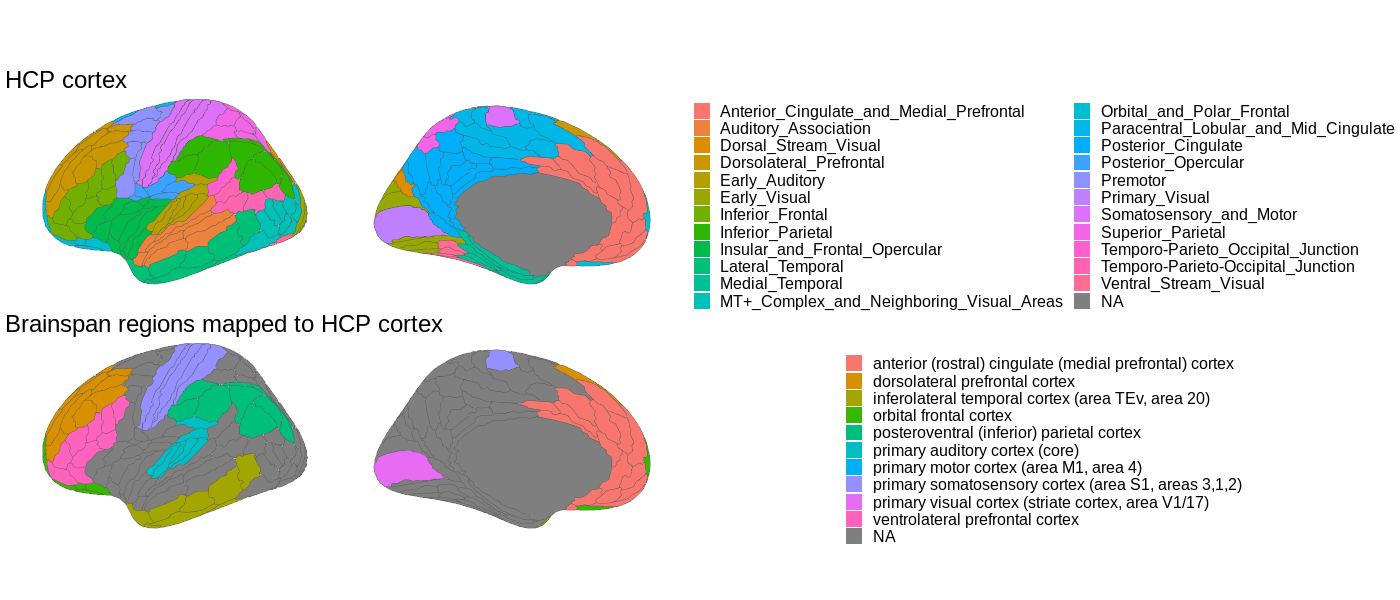

In [668]:
%%R -i hcp_bs -w 1400 -h 600
library(pals)

glasser$data <- glasser$data %>% filter(hemi=='left')
# ix_matches <- match(hcp_bs$hcp_cortex %>% unique() %>% sort(), hcp_info$cortex %>% unique() %>% sort())
# palette_all <- as.vector(polychrome(23))
# palette_matched <- palette_all[ix_matches]

g0 <- ggplot(hcp_bs) + 
geom_brain(atlas=glasser, mapping=aes(fill=cortex, geometry=geometry, hemi=hemi, side=side, type=type)) +
guides(fill=guide_legend('')) +
theme_void() + ggtitle('HCP cortex') + theme(text=element_text(size=20), plot.title=element_text(vjust=-1))

g1 <- ggplot(hcp_bs) + 
geom_brain(atlas=glasser, mapping=aes(fill=structure_name, geometry=geometry, hemi=hemi, side=side, type=type)) +
guides(fill=guide_legend('')) +
theme_void() + ggtitle('Brainspan regions mapped to HCP cortex') + theme(text=element_text(size=20), plot.title=element_text(vjust=-1))

g0/g1

## Clean, normalize, and aggregate Brainspan adult data

In [7]:
# First join the sample data and select only adults
bs_adult = (pd.concat([
    bs_exp.T,
    bs_col.set_index('column_num')[['donor_id', 'age', 'structure_name']]
], axis=1)
 .loc[lambda x: np.isin(x['structure_name'], hcp_bs['structure_name'])] # filter for mapped regions
 .assign(age_group = lambda x: x['age'].map(age_groups))
 .drop(['age'], axis=1)
 .query("age_group == '20-40 yrs'")
 .set_index(['donor_id', 'age_group', 'structure_name'])
)

In [8]:
# Then join the gene data and fix duplicate values
bs_adult_clean = (bs_adult            
 .set_axis(bs_row['gene_symbol'], axis=1)
 .fillna(0)
 .loc[:, lambda x: (x != 0).all(axis=0)] # drop zero and na columns
 .loc[:, lambda x: ~x.columns.duplicated()] # some columns are duplicates
)

In [9]:
# Normalize by donor
# from sklearn.preprocessing import StandardScaler

bs_adult_norm = (bs_adult_clean
### normalization by region
 # .apply(lambda x: (x-np.mean(x))/np.std(x), axis=1)
# ### normalization by donor
 .groupby(['donor_id', 'age_group'])
 .apply(lambda x: (x-np.mean(x))/np.std(x)) # normalize by donor
# ###       
)
bs_adult_norm.shape

(57, 19745)

In [10]:
# Aggregate over donors
bs_agg = (bs_adult_norm
 .reset_index()
 .drop(['donor_id'], axis=1)
 .groupby(['age_group', 'structure_name']).mean()
)
bs_agg.head()

gene_symbol                                                     TSPAN6  \
age_group structure_name                                                 
20-40 yrs anterior (rostral) cingulate (medial prefrontal...  0.092514   
          dorsolateral prefrontal cortex                      0.704791   
          inferolateral temporal cortex (area TEv, area 20)   1.501364   
          orbital frontal cortex                             -0.214606   
          posteroventral (inferior) parietal cortex          -0.105615   

gene_symbol                                                       DPM1  \
age_group structure_name                                                 
20-40 yrs anterior (rostral) cingulate (medial prefrontal...  0.134719   
          dorsolateral prefrontal cortex                      0.199542   
          inferolateral temporal cortex (area TEv, area 20)   0.179532   
          orbital frontal cortex                             -0.441517   
          posteroventral (inferior) parietal cortex           0.011291   

gene_symbol                                                      SCYL3  \
age_group structure_name                                                 
20-40 yrs anterior (rostral) cingulate (medial prefrontal...  0.563187   
          dorsolateral prefrontal cortex                      1.065739   
          inferolateral temporal cortex (area TEv, area 20)  -0.936734   
          orbital frontal cortex                              0.580427   
          posteroventral (inferior) parietal cortex          -0.066226   

gene_symbol                                                   C1orf112  \
age_group structure_name                                                 
20-40 yrs anterior (rostral) cingulate (medial prefrontal... -0.314464   
          dorsolateral prefrontal cortex                      0.609270   
          inferolateral temporal cortex (area TEv, area 20)  -0.592449   
          orbital frontal cortex                              0.111114   
          posteroventral (inferior) parietal cortex           0.356520   

gene_symbol                                                        FGR  \
age_group structure_name                                                 
20-40 yrs anterior (rostral) cingulate (medial prefrontal... -0.944708   
          dorsolateral prefrontal cortex                     -0.488632   
          inferolateral temporal cortex (area TEv, area 20)  -0.776468   
          orbital frontal cortex                             -0.369039   
          posteroventral (inferior) parietal cortex          -0.166644   

gene_symbol                                                        CFH  \
age_group structure_name                                                 
20-40 yrs anterior (rostral) cingulate (medial prefrontal... -0.546728   
          dorsolateral prefrontal cortex                      0.532137   
          inferolateral temporal cortex (area TEv, area 20)   0.468740   
          orbital frontal cortex                             -0.372128   
          posteroventral (inferior) parietal cortex          -0.045696   

gene_symbol                                                      FUCA2  \
age_group structure_name                                                 
20-40 yrs anterior (rostral) cingulate (medial prefrontal... -0.314813   
          dorsolateral prefrontal cortex                      0.517753   
          inferolateral temporal cortex (area TEv, area 20)   0.554937   
          orbital frontal cortex                             -0.590998   
          posteroventral (inferior) parietal cortex          -0.696268   

gene_symbol                                                       GCLC  \
age_group structure_name                                                 
20-40 yrs anterior (rostral) cingulate (medial prefrontal... -0.239414   
          dorsolateral prefrontal cortex                      0.949322   
          inferolateral temporal cortex (area TEv, area 20)   0.134230 

## Now get AHBA PCs

In [673]:
# hcp_base = pcaVersion(get_expression_abagen(atlas=fetch_hcp(), save_name='hcp_base'))
# expression, stability = get_expression_abagen(atlas=fetch_hcp(), donors_threshold=3, DS_threshold=0, save_name='hcp_3donors', return_stability=True)
# hcp_3donors = pcaVersion(expression)
# hcp_3donors_ds6 = pcaVersion(get_expression_abagen(atlas=fetch_hcp(), donors_threshold=3, DS_threshold=0.6, save_name='hcp_3donors_ds6'))
# hcp_3donors_ds7 = pcaVersion(get_expression_abagen(atlas=fetch_hcp(), donors_threshold=3, DS_threshold=0.7, save_name='hcp_3donors_ds7'))
# hcp_3donors_ds8 = pcaVersion(get_expression_abagen(atlas=fetch_hcp(), donors_threshold=3, DS_threshold=0.8, save_name='hcp_3donors_ds8'))
# hcp_3donors_ds9 = pcaVersion(get_expression_abagen(atlas=fetch_hcp(), donors_threshold=3, DS_threshold=0.9, save_name='hcp_3donors_ds9'))

In [15]:
data_dir = "../data/abagen-data/expression/"
hcp_base = pcaVersion(pd.read_csv(data_dir + "hcp_base.csv", index_col=0))
# hcp_3donors = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors.csv', index_col=0))
# hcp_3donors.stability = pd.read_csv("../data/abagen-data/stability_3donors.csv", index_col=0, names=['DS'], header=0)
# hcp_3donors_ds5 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds5.csv', index_col=0))
# hcp_3donors_ds6 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds6.csv', index_col=0))
# hcp_3donors_ds7 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds7.csv', index_col=0))
# hcp_3donors_ds8 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds8.csv', index_col=0))
# hcp_3donors_ds9 = pcaVersion(pd.read_csv(data_dir + 'hcp_3donors_ds9.csv', index_col=0))

New PCA version


Output DS ranks for enrichment

In [678]:
def sort_genes(df, col):
    out = pd.concat([
        df.sort_values(col, ascending=False).index.to_series().reset_index(drop=True).rename(f'{col}_pos'),
        df.sort_values(col, ascending=True).index.to_series().reset_index(drop=True).rename(f'{col}_neg')
    ], axis=1)
    return out

In [679]:
# stability.to_frame('DS').pipe(sort_genes, col='DS').to_csv("../outputs/DS_genes.csv")

AttributeError: 'DataFrame' object has no attribute 'to_frame'

Output gene ranks for enrichment

In [6]:
def sort_genes_PCs(version, i=0, asc=False):
    name = f'PC{i+1}_neg' if asc else f'PC{i+1}_pos'
    return version.coefs.T.iloc[:,:3].sort_values(i, ascending=asc).index.to_series().reset_index(drop=True).rename(name)

def output_PC_gene_ranks(version, name):
    pd.concat([sort_genes_PCs(version, i, asc) for i in range(3) for asc in [False, True]], axis=1).to_csv(f"../outputs/{name}.csv")

In [7]:
output_PC_gene_ranks(hcp_3donors_ds6, "hcp_ds6")

Save genes not in DS9

In [ ]:
# (hcp_3donors.coefs.columns
#  .difference(hcp_3donors_ds9.coefs.columns)
#  .to_series().to_csv("../outputs/non_ds9_genes.csv")
# )

In [12]:
version = hcp_3donors_ds8
hcp_filtered, hcp_mean = get_filtered_hcp(version, bs_agg, hcp_bs, hcp_info)

In [13]:
bs_pcs_hcp = get_bs_pcs(version, bs_agg, hcp_bs)

Get correlations to add to plot

In [18]:
hcp_scores, cortex_scores, corrs = get_scores(version, bs_agg, hcp_bs, hcp_info, hcp_base)

In [29]:
out_dir = "../outputs/"
hcp_scores.to_csv(out_dir+'brainspan_scores.csv')
corrs.to_csv(out_dir+'brainspan_corrs.csv')
cortex_scores.to_csv(out_dir+'brainspan_cortex.csv')

In [28]:
cortex_scores

version   PC                                    cortex  AHBA_mean  Brainspan
0        PC1  Anterior_Cingulate_and_Medial_Prefrontal  -1.141108  -1.140586
1        PC1                   Dorsolateral_Prefrontal   0.205261  -0.078373
2        PC1                            Early_Auditory   1.152898   1.012279
3        PC1                          Inferior_Frontal   0.127517   0.513640
4        PC1                         Inferior_Parietal   0.848903   0.755358
5        PC1                          Lateral_Temporal  -0.801611  -1.694601
6        PC1                 Orbital_and_Polar_Frontal  -0.915264  -0.278969
7        PC1                            Primary_Visual   3.047711   2.386369
8        PC1                   Somatosensory_and_Motor   1.896986   1.130073
9        PC2  Anterior_Cingulate_and_Medial_Prefrontal   0.581139   0.393041
10       PC2                   Dorsolateral_Prefrontal   1.223966   0.398563
11       PC2                            Early_Auditory  -1.386193  -0.643221
12       PC2                          Inferior_Frontal   0.653914   0.521906
13       PC2                         Inferior_Parietal  -0.866403  -0.562527
14       PC2                          Lateral_Temporal  -1.509000  -1.702967
15       PC2                 Orbital_and_Polar_Frontal  -0.213098  -0.796303
16       PC2                            Primary_Visual  -2.592098  -1.412986
17       PC2                   Somatosensory_and_Motor   0.770870   1.757713
18       PC3  Anterior_Cingulate_and_Medial_Prefrontal   0.646811   1.122191
19       PC3                   Dorsolateral_Prefrontal  -0.636544  -1.002501
20       PC3                            Early_Auditory   1.223818   1.196423
21       PC3                          Inferior_Frontal  -1.407110  -0.592716
22       PC3                         Inferior_Parietal  -0.140122  -1.086146
23       PC3                          Lateral_Temporal   0.339578   0.810192
24       PC3                 Orbital_and_Polar_Frontal  -1.224202  -1.147658
25       PC3                            Primary_Visual   2.375090   0.921422
26       PC3                   Somatosensory_and_Motor   1.870135   0.490292

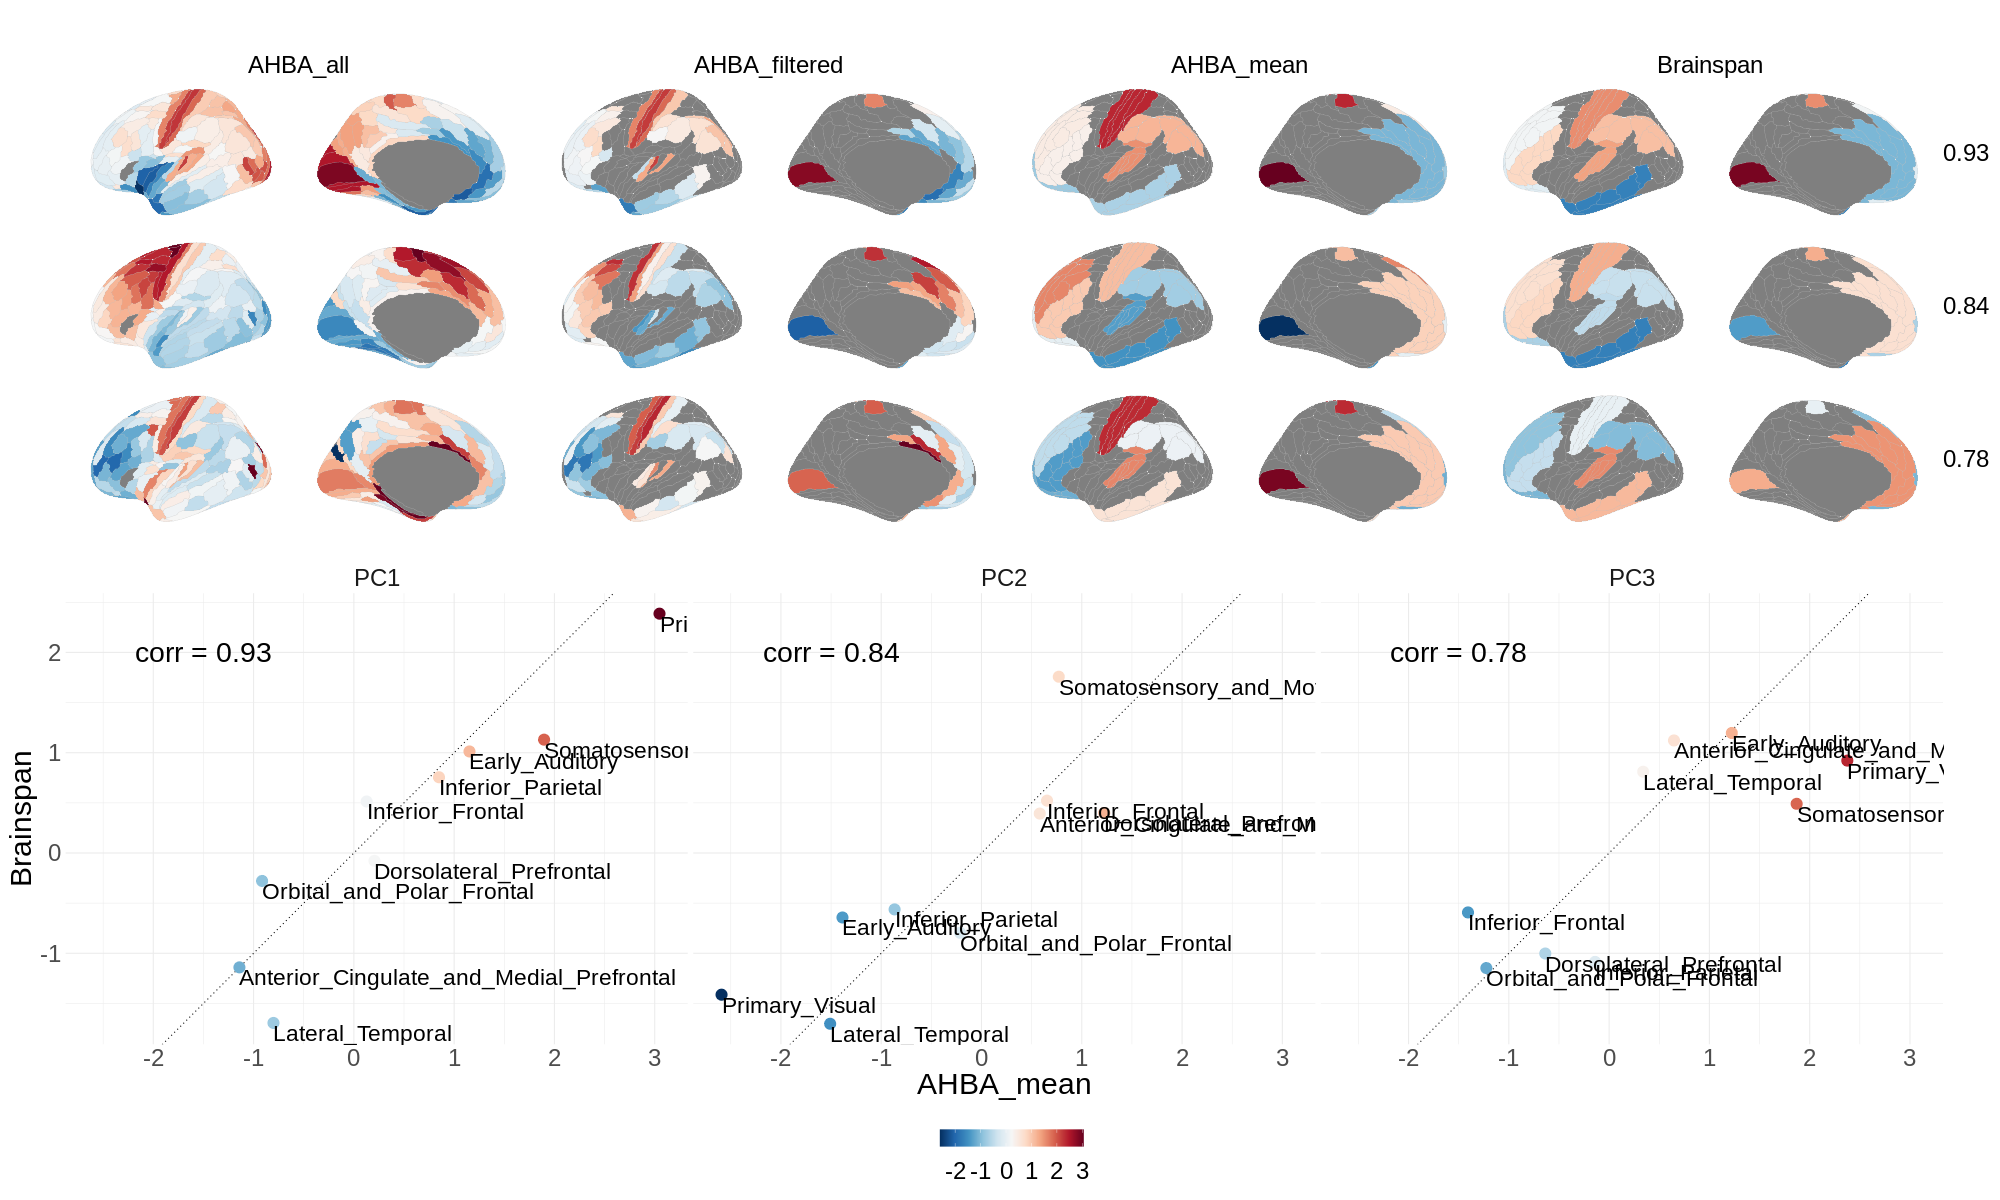

In [20]:
%%R -i hcp_scores -i corrs -i cortex_scores -w 2000 -h 1200
source("../code/brainspan.R")
g1 <- plot_ahba_bs_brains(hcp_scores, corrs)
g2 <- plot_ahba_bs_scatter(cortex_scores, corrs)
g1 / g2

# Correlation of individual genes?

Get AHBA expression mean over HCP cortices

In [685]:
version = hcp_3donors
gene_mask = version.coefs.columns.intersection(bs_agg.columns)

hcp_filtered_genes = (version.expression
 .join(get_labels_hcp())
 .rename_axis('id')
 .join(hcp_bs.set_index('region'), on='label')
 .dropna(axis=0)
)

hcp_mean_genes = (hcp_filtered_genes
 .groupby('cortex')
 .mean()
 .loc[:, gene_mask]
)

Get brainspan genes

In [686]:
bs_genes = (bs_agg
            .loc[:, gene_mask].reset_index(level=0, drop=True)
            .assign(cortex = lambda x: x.index.map(bs_hcp_map))
            .set_index('cortex')
           )

Get correlation of matching genes with Brainspan

In [687]:
genes_corr = hcp_mean_genes.corrwith(bs_genes).to_frame('corr')
genes_corr_with_stability = genes_corr.join(hcp_3donors.stability).assign(cutoff = lambda x: x['DS'] >= np.quantile(x['DS'], .9))

In [ ]:
# sort_genes(genes_corr, 'corr').to_csv("../outputs/AHBA_BS_corr_genes_ds5.csv")

In [ ]:
# genes_corr_ds9 = genes_corr
# genes_corr_ds5 = genes_corr
# genes_corr_ds5.join(genes_corr_ds9, rsuffix='_ds9').dropna()

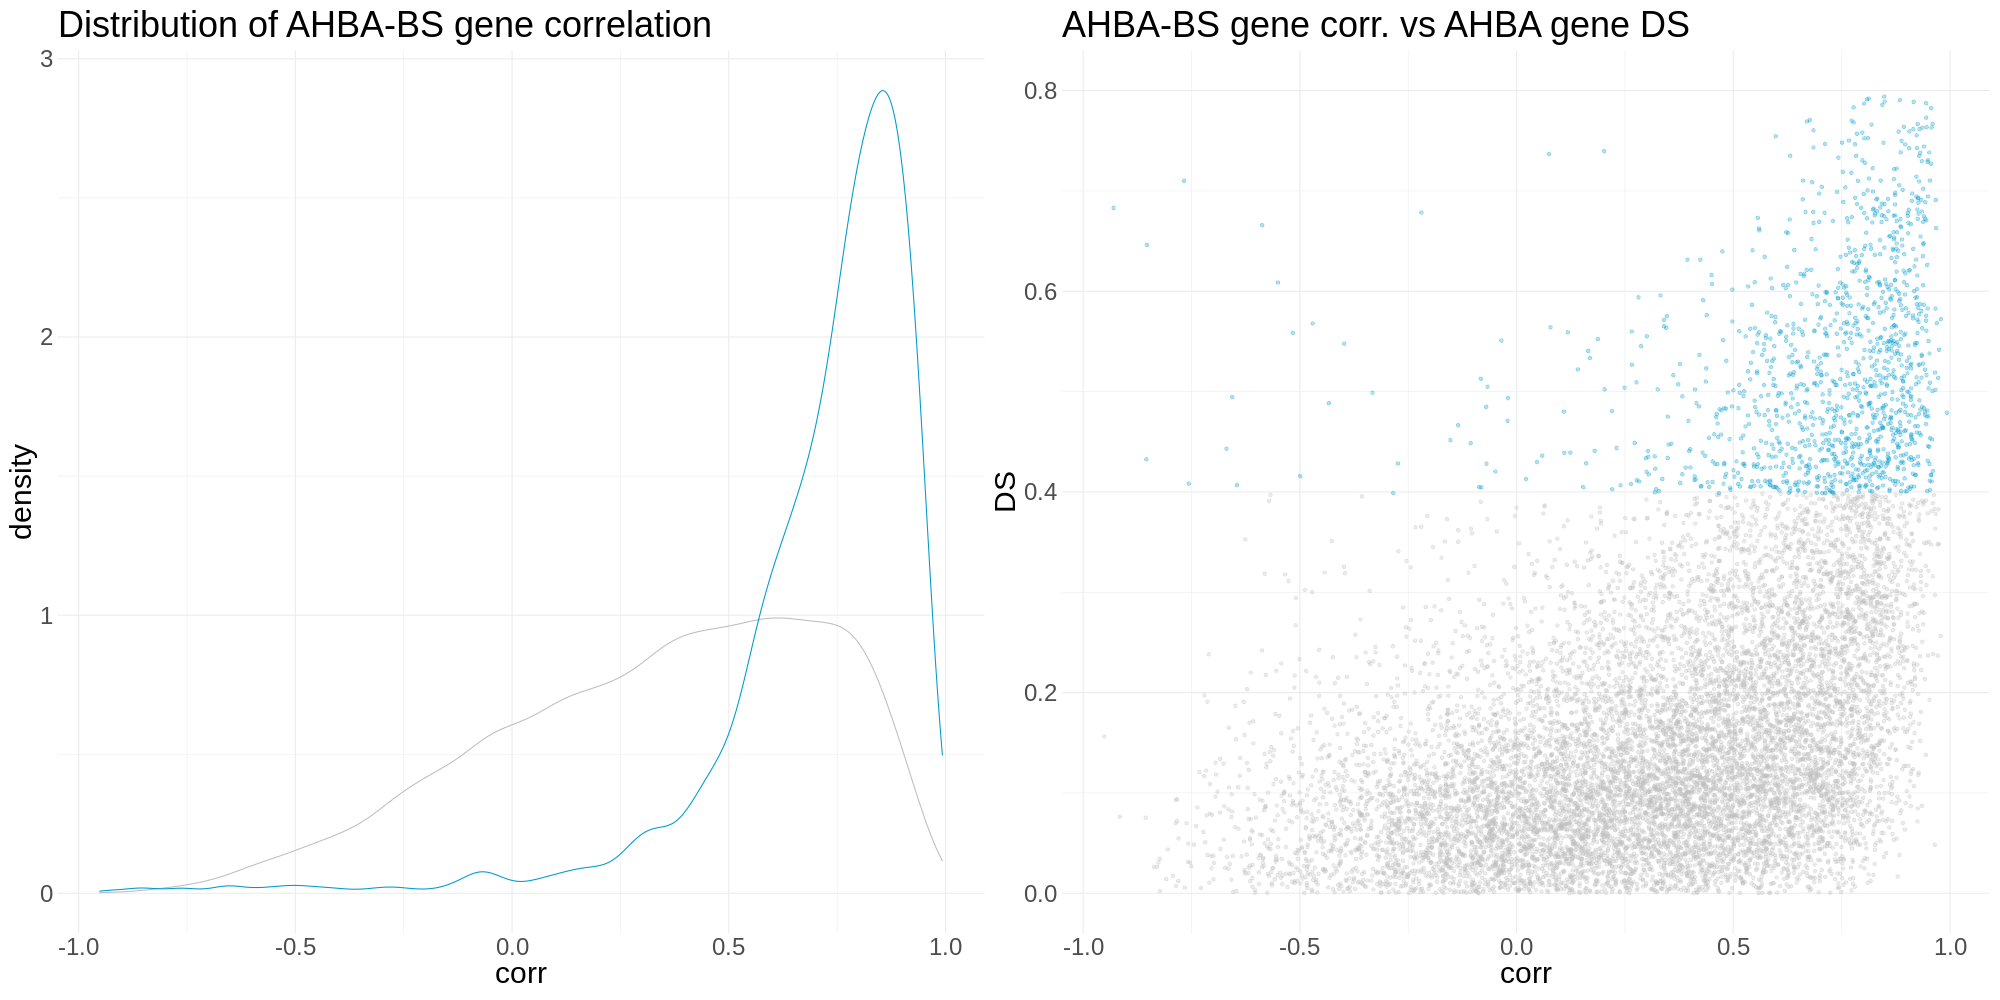

In [688]:
%%R -i genes_corr_with_stability -w 2000 -h 1000
g1 <- ggplot() + 
geom_density(data=genes_corr_with_stability, aes(corr), color='grey') + 
geom_density(data=genes_corr_with_stability%>%filter(cutoff), aes(corr), color='deepskyblue3') + 
theme_minimal() + ggtitle('Distribution of AHBA-BS gene correlation')
g2 <- ggplot(genes_corr_with_stability) + 
geom_point(data=genes_corr_with_stability%>%filter(!cutoff), aes(x=corr, y=DS), color='grey', alpha=.3) + 
geom_point(data=genes_corr_with_stability%>%filter(cutoff), aes(x=corr, y=DS), color='deepskyblue3', alpha=.3) + 
ylim(0,.8) + theme_minimal() + ggtitle("AHBA-BS gene corr. vs AHBA gene DS")
(g1 | g2) & theme(text=element_text(size=30))

In [689]:
genes_corr_with_pcs = (version.coefs.T
                       .iloc[:,:3].set_axis([f'PC{i+1}' for i in range(3)], axis=1)
                       # .apply(abs)
                       .join(genes_corr).melt(id_vars=['corr'], ignore_index=False, var_name='PC', value_name='weight')
                      )
genes_corr_with_pcs

corr   PC    weight
A1BG      0.389968  PC1 -0.013597
A1BG-AS1       NaN  PC1 -0.011040
A2M       0.370301  PC1  0.002475
A2ML1    -0.232088  PC1  0.003552
A3GALT2        NaN  PC1  0.002972
...            ...  ...       ...
ZXDC      0.002131  PC3 -0.011176
ZYG11B    0.086538  PC3  0.006527
ZYX       0.950707  PC3  0.001759
ZZEF1     0.494394  PC3 -0.009781
ZZZ3      0.541401  PC3 -0.010827

[47838 rows x 3 columns]

Scatter plot of genes Brainspan correlation against PC weight

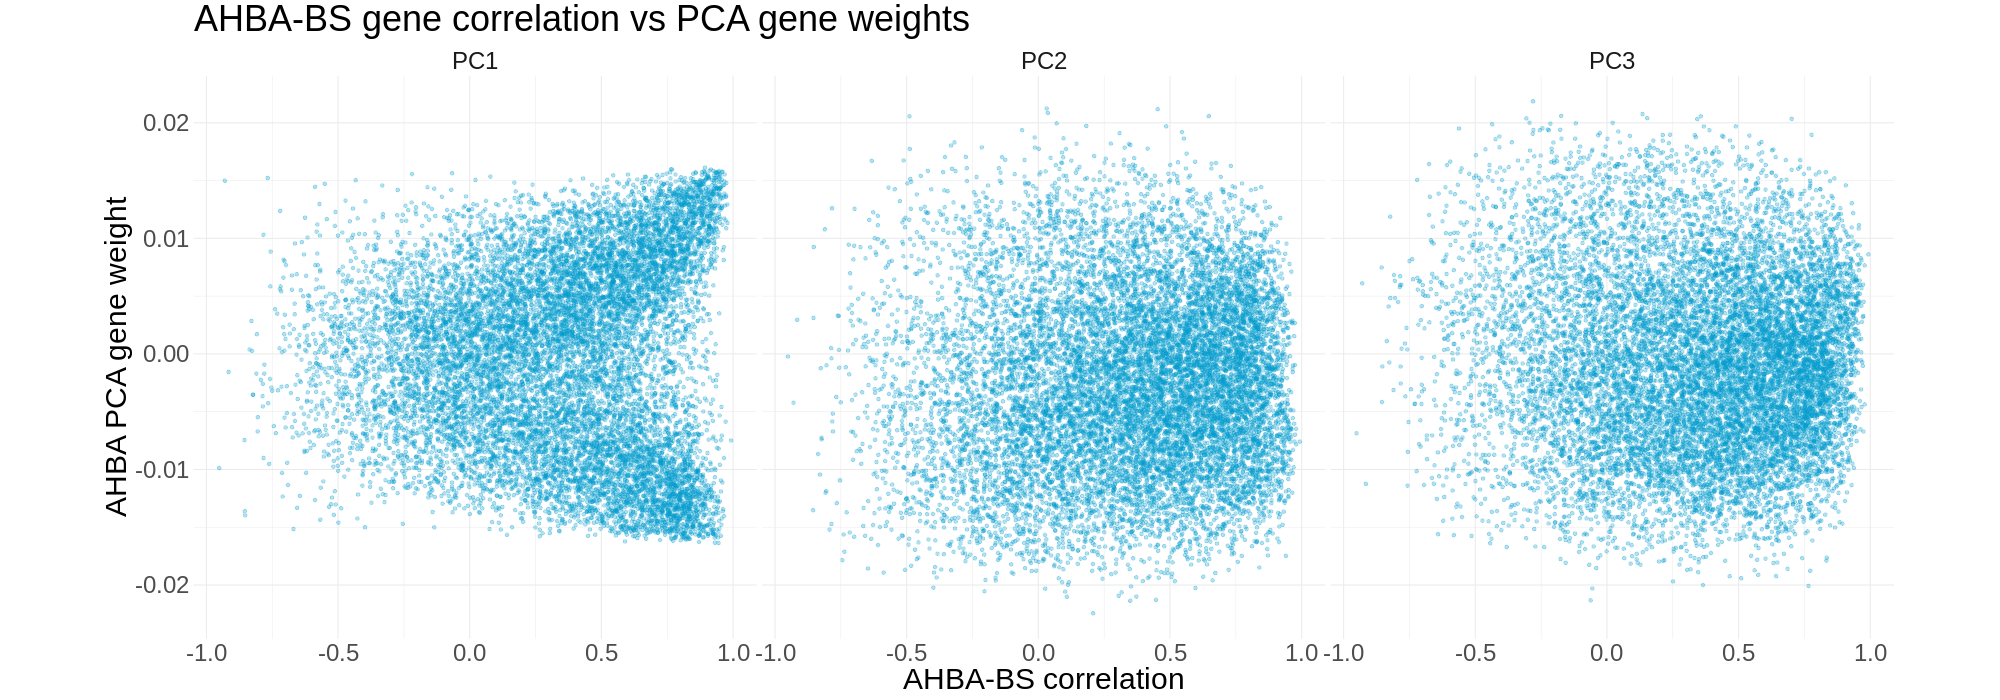

In [690]:
%%R -i genes_corr_with_pcs -w 2000 -h 700
ggplot(genes_corr_with_pcs, aes(x=corr, y=weight)) + facet_grid(.~PC) + geom_point(alpha=.3, color='deepskyblue3') + 
xlab('AHBA-BS correlation') + ylab('AHBA PCA gene weight') + ggtitle('AHBA-BS gene correlation vs PCA gene weights') +
theme_minimal() + theme(text=element_text(size=30), aspect.ratio=1) 

In [691]:
genes_corr_with_pcs.groupby('PC').corr().loc[pd.IndexSlice[:,'corr'], 'weight']

PC       
PC1  corr    0.031990
PC2  corr    0.047635
PC3  corr   -0.050608
Name: weight, dtype: float64

## So which DS filter? How many genes are 'real'?

### Plot all DS filter PCs

In [692]:
hcp_ds_versions = {
    'DS 0.5 (8.0k genes)': hcp_3donors_ds5,
    # 'DS 0.6 (6.4k genes)': hcp_3donors_ds6,
    # 'DS 0.7 (4.8k genes)': hcp_3donors_ds7,
    'DS 0.8 (3.2k genes)': hcp_3donors_ds8,
    'DS 0.9 (1.6k genes)': hcp_3donors_ds9
}

In [693]:
hcp_scores = (
    pd.concat({ 
        name:hcp_base.score_from(version) for name, version in hcp_ds_versions.items()
    })
              .reset_index(level=0).rename(columns={'level_0':'version'})
              .join(get_labels_hcp())
              .set_index(['version', 'label'])
              .apply(lambda y: y.groupby('version').apply(lambda x: (x-np.mean(x))/np.std(x)), axis=0) # standardize all versions for plotting
              .reset_index()
)
# hcp_scores

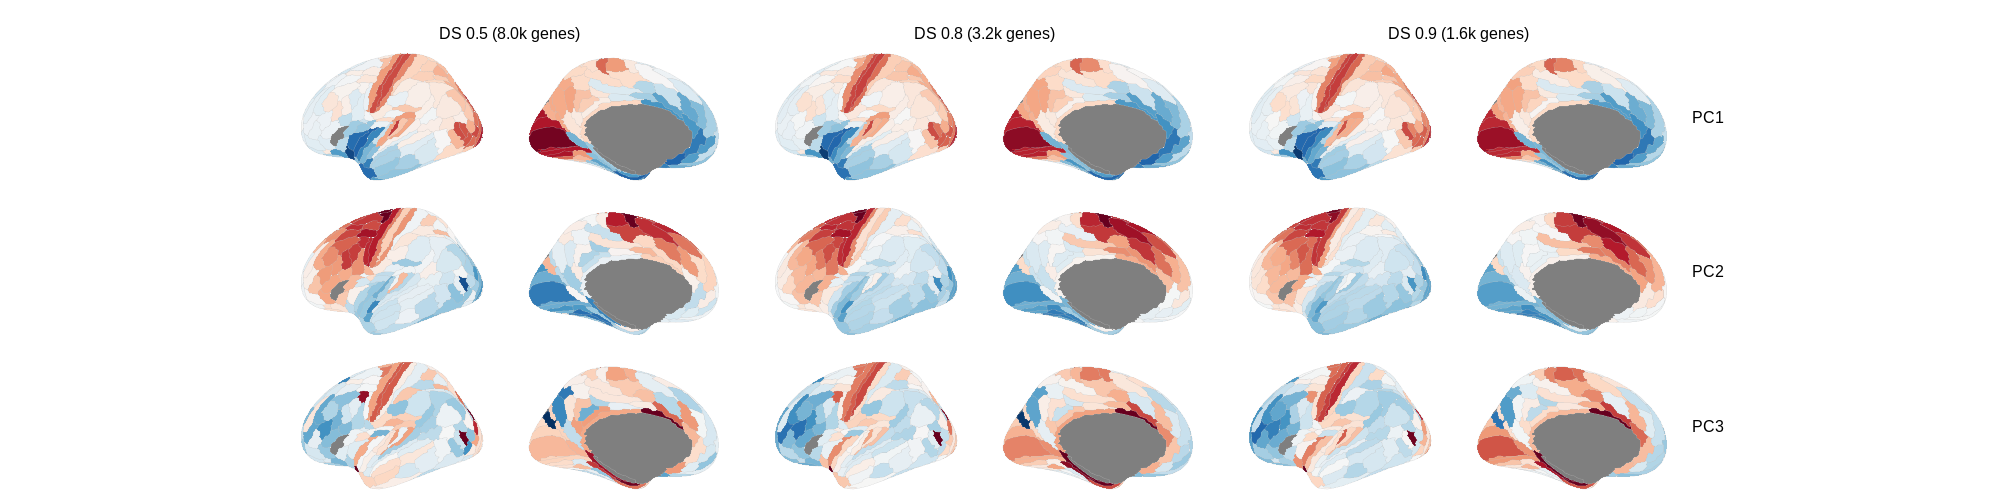

In [694]:
%%R -i hcp_scores -w 2000 -h 500

plot_hcp(hcp_scores, three=T) + 
guides(fill=F) &
theme(text=element_text(size=20))

## VE and Yeo?

In [852]:
HCPmappings = pd.read_csv("../data/vonEconomo_Yeo.csv")

In [857]:
version = hcp_3donors_ds9

In [858]:
# Lobe_cols = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00"]
Lobe_colors = {'Fr':"#377EB8", 'Ins':"#E41A1C", 'Occ':"#4DAF4A", 'Par':"#984EA3", 'Temp':"#FF7F00"}
vonEconomo_labels = {1:'motor',2:'association',3:'association',4:'sensory',5:'sensory',6:'limbic',7:'insula'}
Yeo_labels = {1:'visual',2:'somatomotor',3:'dorsal attention',4:'ventral attention',5:'limbic',6:'frontoparietal',7:'default mode'}

df = (
 hcp_base.score_from(version)
 .apply(lambda x: x/np.std(x))
 .set_axis(['PC'+str(i+1) for i in range(5)],axis=1)
 .join(get_labels_hcp())
 .assign(L_label = lambda x: ['L_' + l for l in x['label']])
 .join(HCPmappings.set_index('HCP'), on='L_label')
 .join(fetch_hcp()['info'].set_index('id')[['Lobe','x-cog','y-cog','z-cog']])
 .rename({'x-cog':'x','y-cog':'y','z-cog':'z'},axis=1)
 .assign(Lobecolors = lambda x: x['Lobe'].map(Lobe_colors))
 .assign(vonEconomo_labels = lambda x: x['vonEconomo'].map(vonEconomo_labels))
 .assign(Yeo_labels = lambda x: x['Yeo'].map(Yeo_labels))
)
df

PC1       PC2       PC3       PC4       PC5  label  L_label  Yeo  \
label                                                                          
1      2.248181 -1.450172  1.642538  2.629118  0.058222     V1     L_V1  1.0   
2      1.713368 -0.396266  0.029353  0.714762 -0.691486    MST    L_MST  1.0   
3      1.067818  0.508377 -1.911509  1.390324 -0.953686     V6     L_V6  1.0   
4      1.968819 -1.233922  1.130421  1.266245 -0.082600     V2     L_V2  1.0   
5      1.969572 -1.401667  0.742197  1.032544  0.299061     V3     L_V3  1.0   
...         ...       ...       ...       ...       ...    ...      ...  ...   
176   -0.882093 -0.808667 -0.024237 -0.953641 -0.369405  STSva  L_STSva  7.0   
177   -0.841663 -0.757953 -0.757695 -1.391009 -0.763506   TE1m   L_TE1m  7.0   
178   -1.349165 -1.177610  0.260939  1.126119 -1.280998     PI     L_PI  4.0   
179   -1.291410  1.509659  0.879314  0.718840  0.677717  a32pr  L_a32pr  6.0   
180   -1.616413  1.035329  1.487033  1.092992  1.743814    p24    L_p24  7.0   

       vonEconomo vonEconomo.colors Yeo.colors  pos_all1  pos_all2  pos_all3  \
label                                                                          
1             5.0           #fffb00    #660066   11.2100   49.8160    35.575   
2             4.0           #f59505    #660066   36.2500   34.0110    37.570   
3             4.0           #f59505    #660066   10.0960   35.7500    55.243   
4             4.0           #f59505    #660066   11.1790   46.8900    36.613   
5             4.0           #f59505    #660066   14.5800   47.8790    37.700   
...           ...               ...        ...       ...       ...       ...   
176           2.0           #220ced    #FF6666   47.7880  -20.2020    23.128   
177           2.0           #220ced    #FF6666   56.7780   -7.0496    23.176   
178           3.0           #067a08    #FF00FF   39.7870  -28.6810    22.045   
179           2.0           #220ced    #FF8000    7.9000  -50.3290    56.067   
180           6.0           #00fffb    #FF6666    5.1907  -55.0330    45.853   

       Lobe           x           y           z Lobecolors vonEconomo_labels  \
label                                                                          
1       Occ  100.491589   41.138901   71.637040    #4DAF4A           sensory   
2       Occ  132.416667   58.901786   82.059524    #4DAF4A           sensory   
3       Occ  104.543112   44.481665  103.916749    #4DAF4A           sensory   
4       Occ  102.236656   44.064791   74.401125    #4DAF4A           sensory   
5       Occ  107.926111   40.632159   76.961153    #4DAF4A           sensory   
...     ...         ...         ...         ...        ...               ...   
176    Temp  142.689243  118.134462   52.832669    #FF7F00       association   
177    Temp  155.554922  101.395287   54.901178    #FF7F00       association   
178    Temp  134.650549  124.293407   56.102198    #FF7F00       association   
179      Fr   97.782313  155.883735  101.539270    #377EB8       association   
180      Fr   95.442887  162.526279   84.888577    #377EB8            limbic   

              Yeo_labels  
label                     
1                 visual  
2                 visual  
3                 visual  
4                 visual  
5                 visual  
...                  ...  
176         default mode  
177         default mode  
178    ventral attention  
179       frontoparietal  
180         default mode  

[177 rows x 21 columns]

In [859]:
scores_hcp_wide = hcp_base.score_from(version).apply(lambda x: x/np.std(x)).join(get_labels_hcp()).drop([3,4],axis=1)

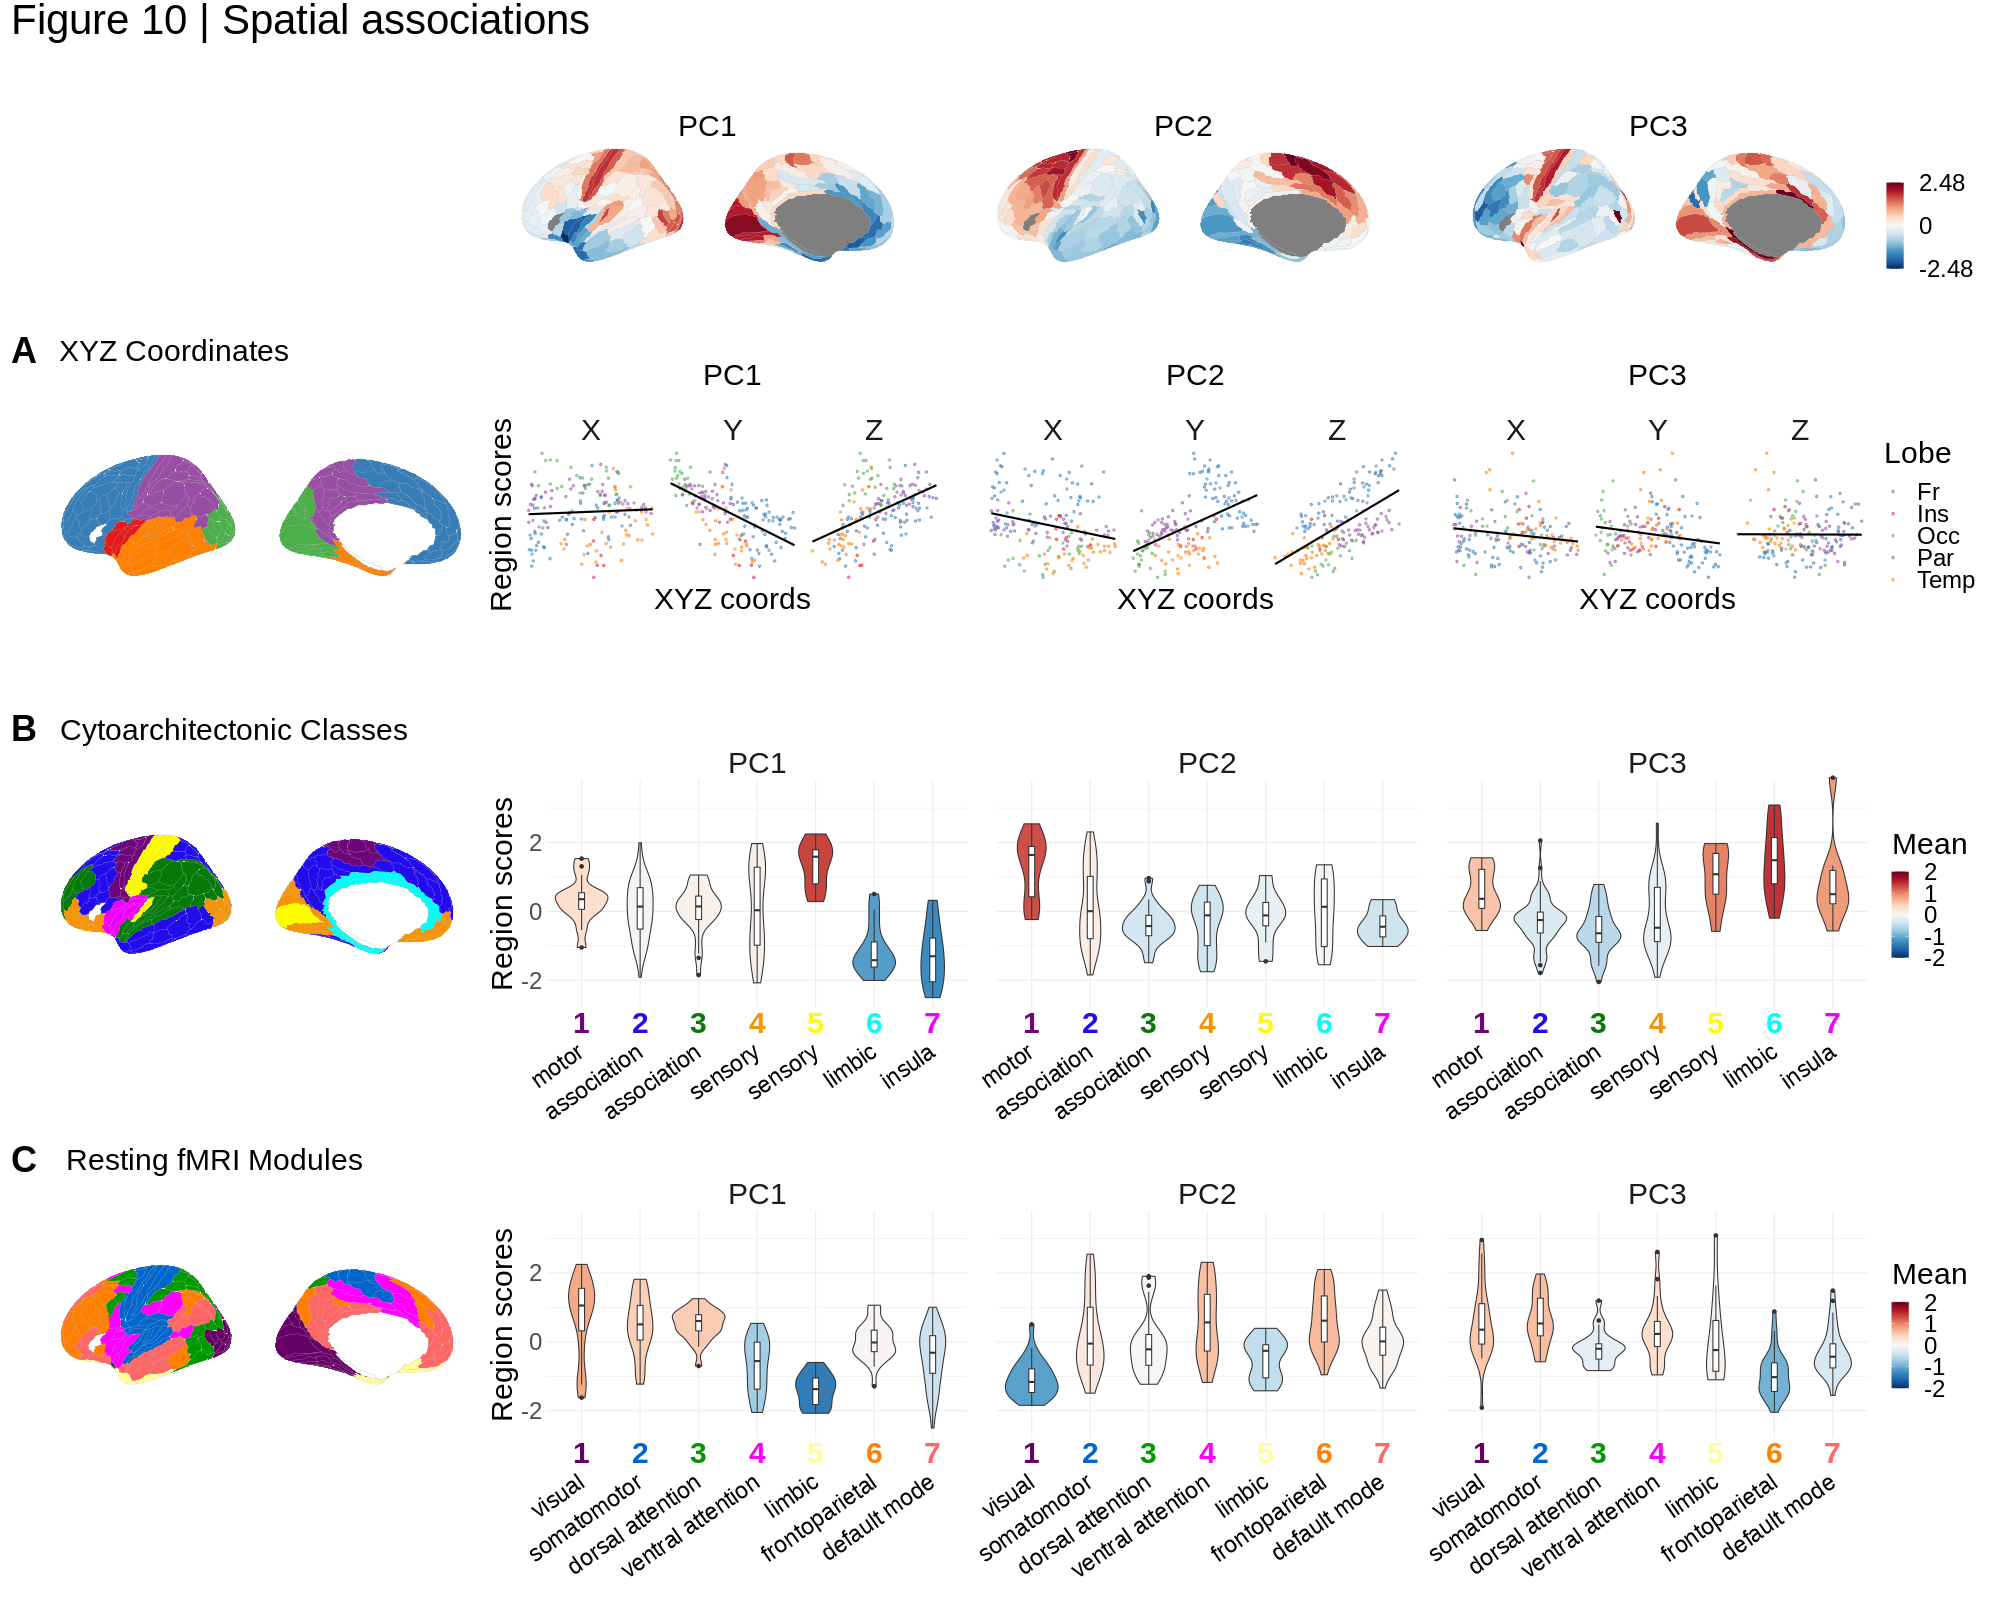

In [860]:
%%R -w 2000 -h 1600 -i df -i scores_hcp_wide
source("../code/brainPlots.R")
Lobe_colors = c('#377EB8', '#E41A1C', '#4DAF4A', '#984EA3', '#FF7F00')
g0 <- plot_hcp_classes(df, classes=Lobe, classcolors=Lobecolors) + ggtitle('XYZ Coordinates') + theme(plot.title=element_text(size=30, hjust=0.1))
g01 <- plot_xyz(df, PC1, 'PC1', colors=Lobe_colors)
g02 <- plot_xyz(df, PC2, 'PC2', colors=Lobe_colors)
g03 <- plot_xyz(df, PC3, 'PC3', colors=Lobe_colors)

g1 <- plot_hcp_classes(df, vonEconomo, vonEconomo.colors) + ggtitle('Cytoarchitectonic Classes') + theme(plot.title=element_text(size=30, hjust=0.25))
g1x <- plot_violins(df, vonEconomo, vonEconomo.colors, vonEconomo_labels)
g2 <- plot_hcp_classes(df, Yeo, Yeo.colors) + ggtitle('Resting fMRI Modules') + theme(plot.title=element_text(size=30, hjust=0.2))
g2x <- plot_violins(df, Yeo, Yeo.colors, Yeo_labels)

g5 <- plot_hcp_wide(scores_hcp_wide)

(
    ((plot_spacer() | g5 + plot_layout(tag_level='new')) + plot_layout(widths=c(1,3)) ) /     
    ((g0 | ((g01|g02|g03) & plot_layout(tag_level='new'))) + plot_layout(widths=c(1,3),guides='collect') ) /
    ((g1 | g1x + plot_layout(tag_level='new')) + plot_layout(widths=c(1,3)) ) / 
    ((g2 | g2x + plot_layout(tag_level='new')) + plot_layout(widths=c(1,3)) ) /
    plot_spacer() & theme(text=element_text(size=30), strip.text=element_text(size=30))
) + plot_layout(heights=c(3,4,4,4,1)) +
    plot_annotation(tag_levels='A',title='Figure 10 | Spatial associations',
                theme=theme(plot.title=element_text(size=42, hjust=0))) & theme(plot.tag=element_text(size=36, face='bold', vjust=-3.4))

## Weight genes by DS? 

In [699]:
# stab = hcp_3donors.stability
stab = pd.DataFrame(hcp_3donors.stability['DS'])#.clip(lower=0))

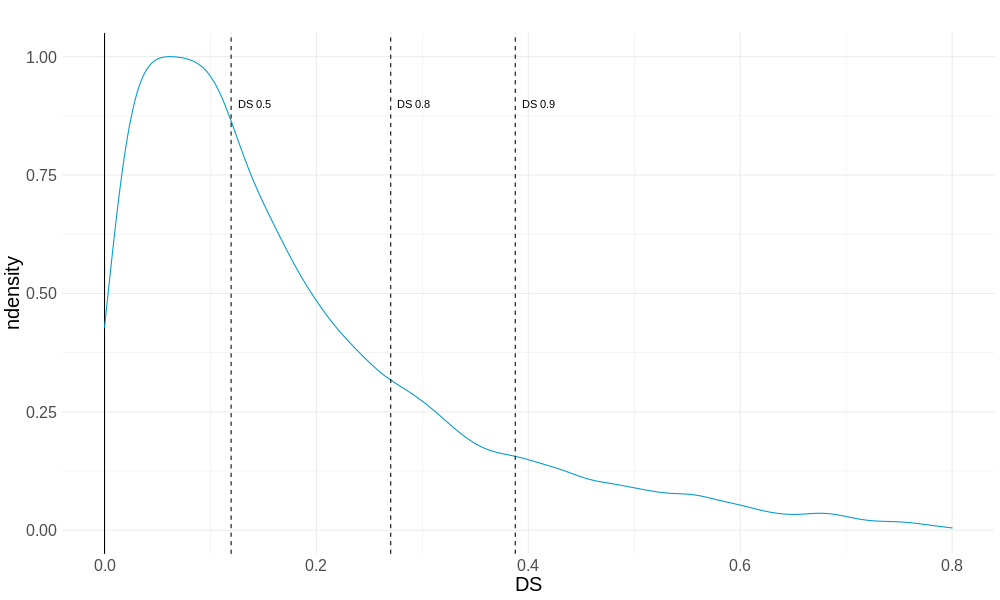

In [700]:
%%R -i stab -w 1000 -h 600
q <- c(.5,.8,.9)
ggplot(stab) + geom_vline(xintercept=0) + 
geom_density(aes(x=DS, y = after_stat(ndensity)), color='deepskyblue3') +
geom_vline(xintercept=quantile(stab$DS, q), linetype=2) +
annotate('text', x=quantile(stab$DS, q), y=.9, label=paste('DS',q), hjust=-.2) +
xlim(c(0,.8)) +
ggtitle('') + 
theme_minimal() + theme(text=element_text(size=20))

In [724]:
def sig(x, beta, nu, pos=0.38):
    return 1/(1+np.exp(np.multiply((x-pos), -beta)))**(1/nu)

x = np.linspace(0,1, 101)
nus = [1,5,10,20,25]
df=pd.DataFrame.from_dict({nu: sig(x,200,nu) for nu in nus}).assign(x=x)

In [703]:
betas = [20, 50, 100, 200]
df=pd.DataFrame.from_dict({b: sig(x,b,1,0.38) for b in betas}).assign(x=x)

In [811]:
nus = [1]
df=pd.DataFrame.from_dict({nu: sig(x,30,nu, pos=0.25) for nu in nus}).assign(x=x)

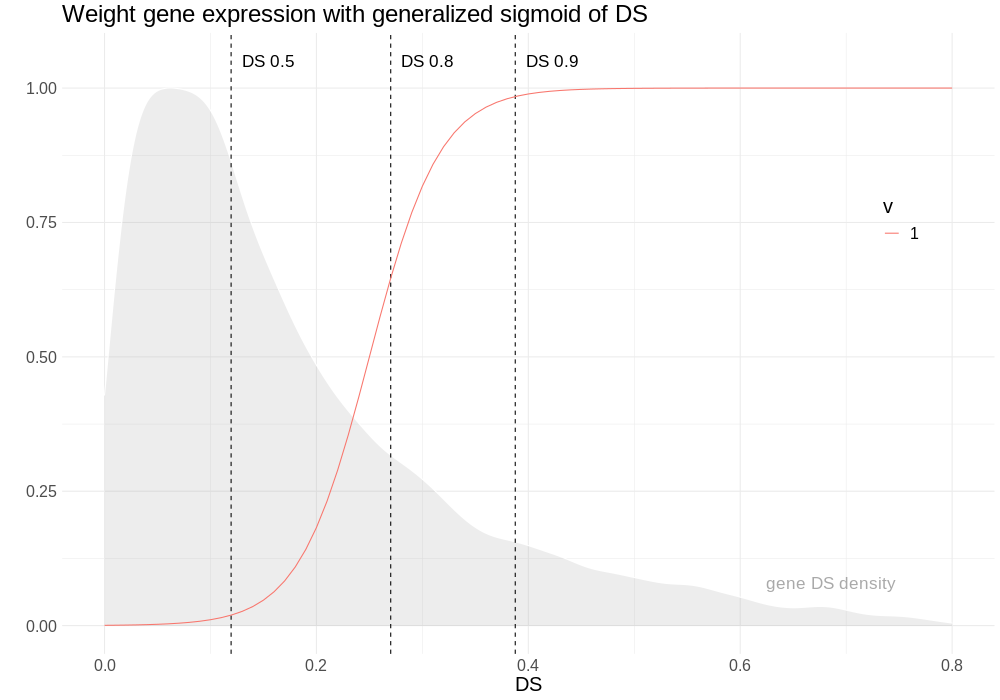

In [812]:
%%R -i df -i stab -w 1000 -h 700
q <- c(.5,.8,.9)

df %>% gather(v, y,-x) %>%
# mutate(v = factor(v, levels=c(1,5,10,20,25))) %>%
# mutate(b = factor(b, levels=c(200,100,50,20))) %>%
ggplot() + 
geom_density(data=stab, aes(x=DS, y = after_stat(ndensity)), 
             fill='darkgrey', alpha=.2, color='white') +
geom_vline(xintercept=quantile(stab$DS,q), linetype=2) +
annotate('text', x=quantile(stab$DS, q), y=1.05, label=paste('DS',q), hjust=-.2, size=6) +
annotate('text', x=.6, y=.08, label='gene DS density', color='darkgrey', hjust=-.2, size=6) +
geom_line(aes(x,y,color=v)) + 
xlim(0,.8) + ylab('') +
ggtitle("Weight gene expression with generalized sigmoid of DS") +
theme_minimal() + theme(text=element_text(size=20), legend.position = c(.9,.7))

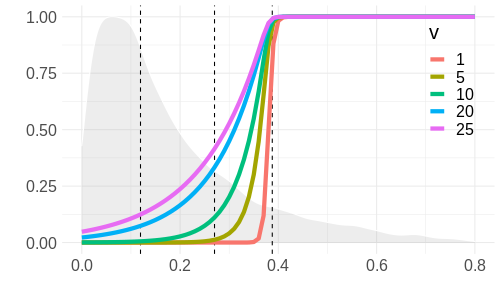

In [707]:
%%R -i df -i stab -w 500 -h 300
q <- c(.5,.8,.9)

df %>% gather(v, y,-x) %>%
mutate(v = factor(v, levels=c(1,5,10,20,25))) %>%
# mutate(b = factor(b, levels=c(200,100,50,20))) %>%
ggplot() + 
geom_density(data=stab, aes(x=DS, y = after_stat(ndensity)), 
             fill='darkgrey', alpha=.2, color='white') +
geom_vline(xintercept=quantile(stab$DS,q), linetype=2) +
# annotate('text', x=quantile(stab$DS, q), y=1.05, label=paste('DS',q), hjust=-.2, size=6) +
# annotate('text', x=.6, y=.08, label='gene DS density', color='darkgrey', hjust=-.2, size=6) +
geom_line(aes(x,y,color=v), size=2) + 
xlim(0,.8) + ylab('') + xlab('') +
# ggtitle("Weight gene expression with generalized sigmoid of DS") +
theme_minimal() + theme(text=element_text(size=20), legend.position = c(.9,.7))

In [861]:
weights = sig(hcp_3donors.stability['DS'], beta=30, nu=0.02, pos=0.04)
# weights = sig(hcp_3donors.stability['DS'], beta=30, nu=1, pos=0.25)
hcp_3donors_weights = pcaVersion(hcp_3donors_ds5.expression * weights, scale=False)
print("Corr:")
hcp_3donors_weights.corr_coefs(hcp_3donors_ds5).pipe(np.diag)[:3]

New PCA version
Corr:


array([0.92887727, 0.87953087, 0.82850981])

Now compare brainspan

In [862]:
version = hcp_3donors_weights
hcp_scores, cortex_scores, corrs = get_scores(version, bs_agg, hcp_bs, hcp_info, hcp_base)

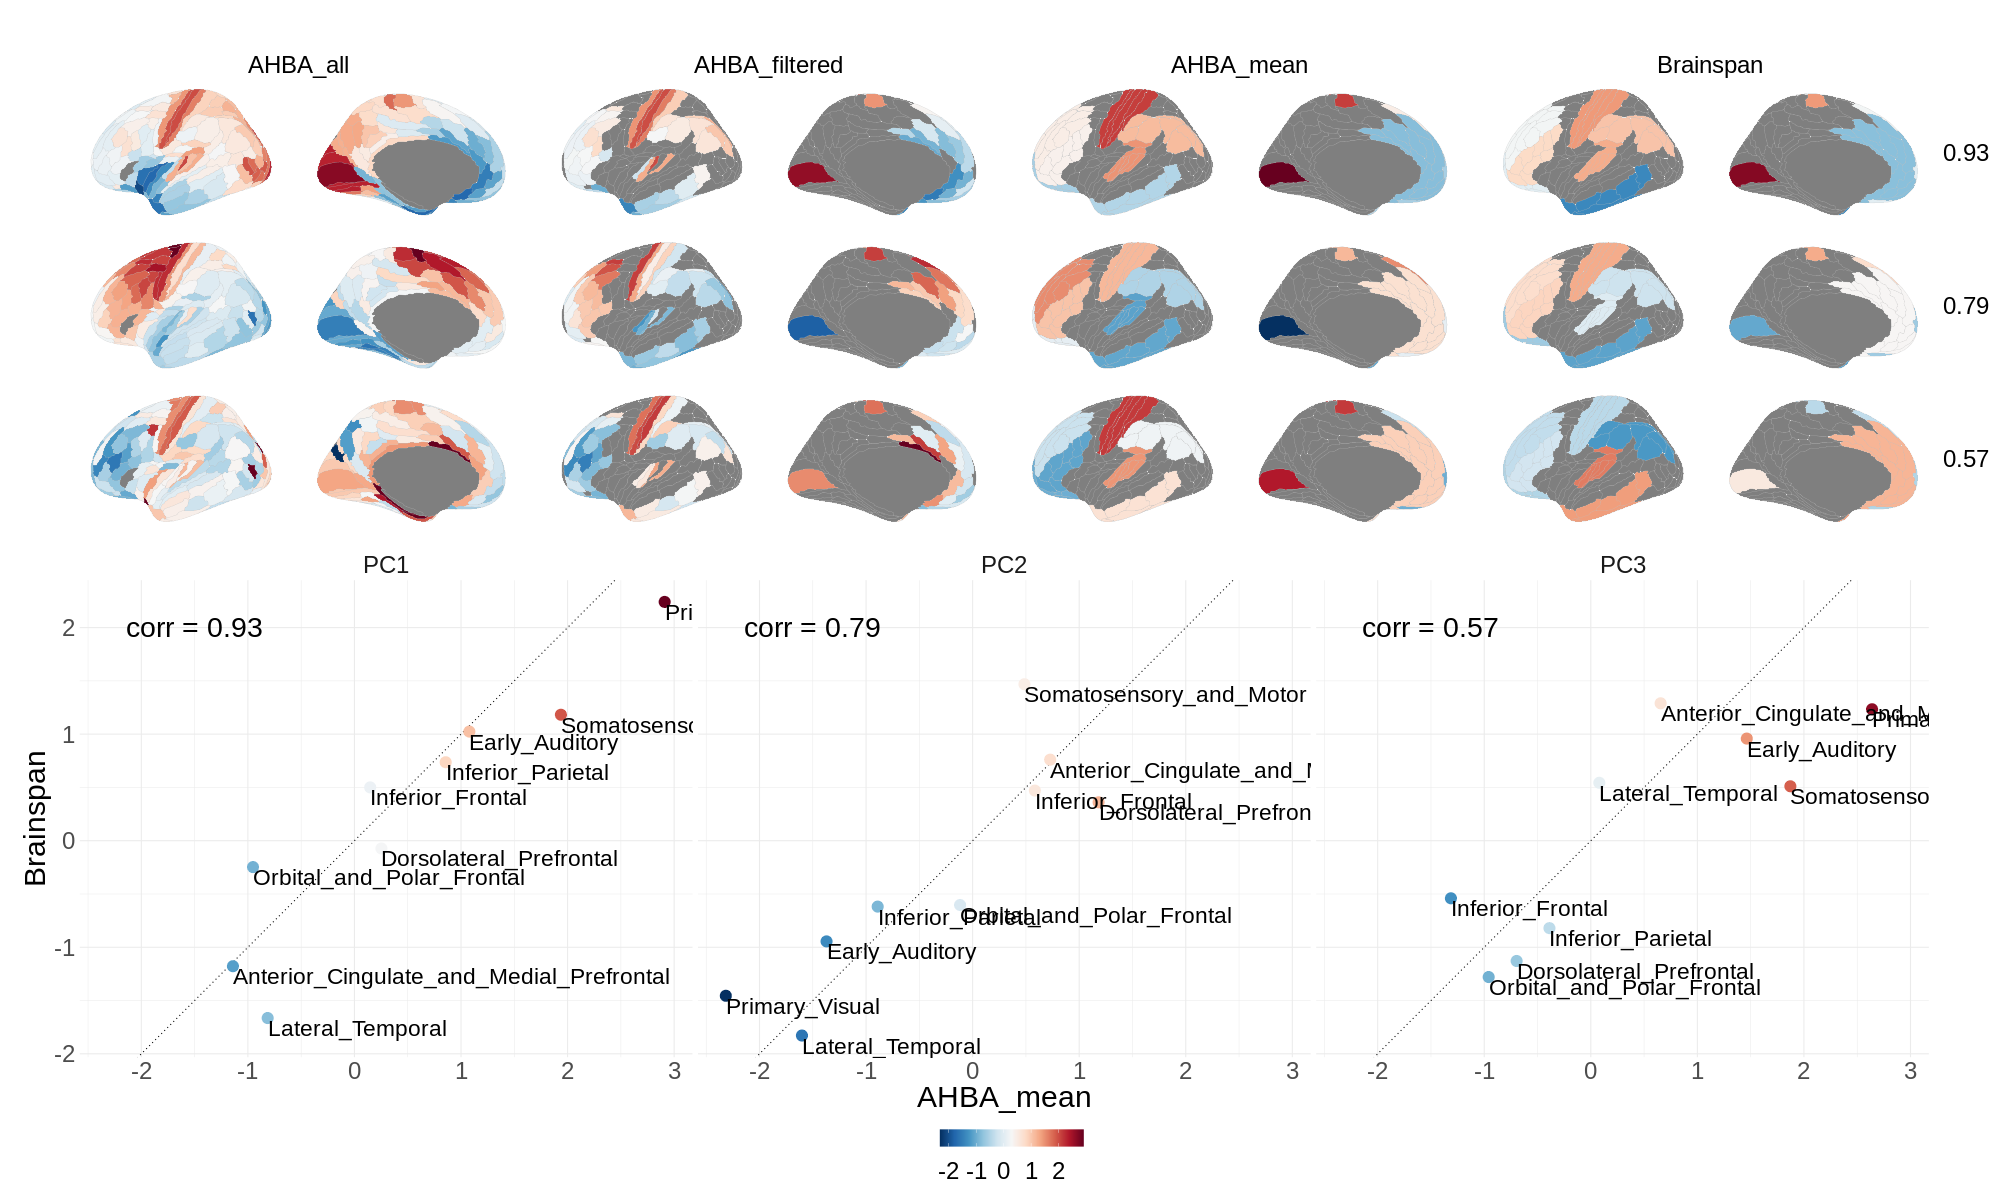

In [863]:
%%R -i hcp_scores -i corrs -w 2000 -h 1200
source("../code/brainspan.R")
g1 <- plot_ahba_bs_brains(hcp_scores, corrs)
g2 <- plot_ahba_bs_scatter(cortex_scores, corrs)
g1 / g2

In [810]:
# output_PC_gene_ranks(hcp_3donors_weights, 'hcp_weights_ds5_x25_b30_v1')

## Or ... just hard filter for genes that correlate with Brainspan??

In [729]:
np.quantile(genes_corr_with_stability['corr'], .5)

0.3910749606900203

In [749]:
gene_list_high_corr = (genes_corr_with_stability
 .loc[lambda x: x['corr'] >= np.quantile(x['corr'], .2)]
 .loc[lambda x: x['DS'] >= np.quantile(x['DS'], .5)]
 .index
)

hcp_3donors_corr5 = pcaVersion(hcp_3donors.expression.loc[:, gene_list_high_corr])
hcp_3donors_corr5.coefs.shape

New PCA version


(5, 5071)

In [750]:
version = hcp_3donors_corr5
hcp_scores, cortex_scores, corrs = get_scores(version, bs_agg, hcp_bs, hcp_info, hcp_base)

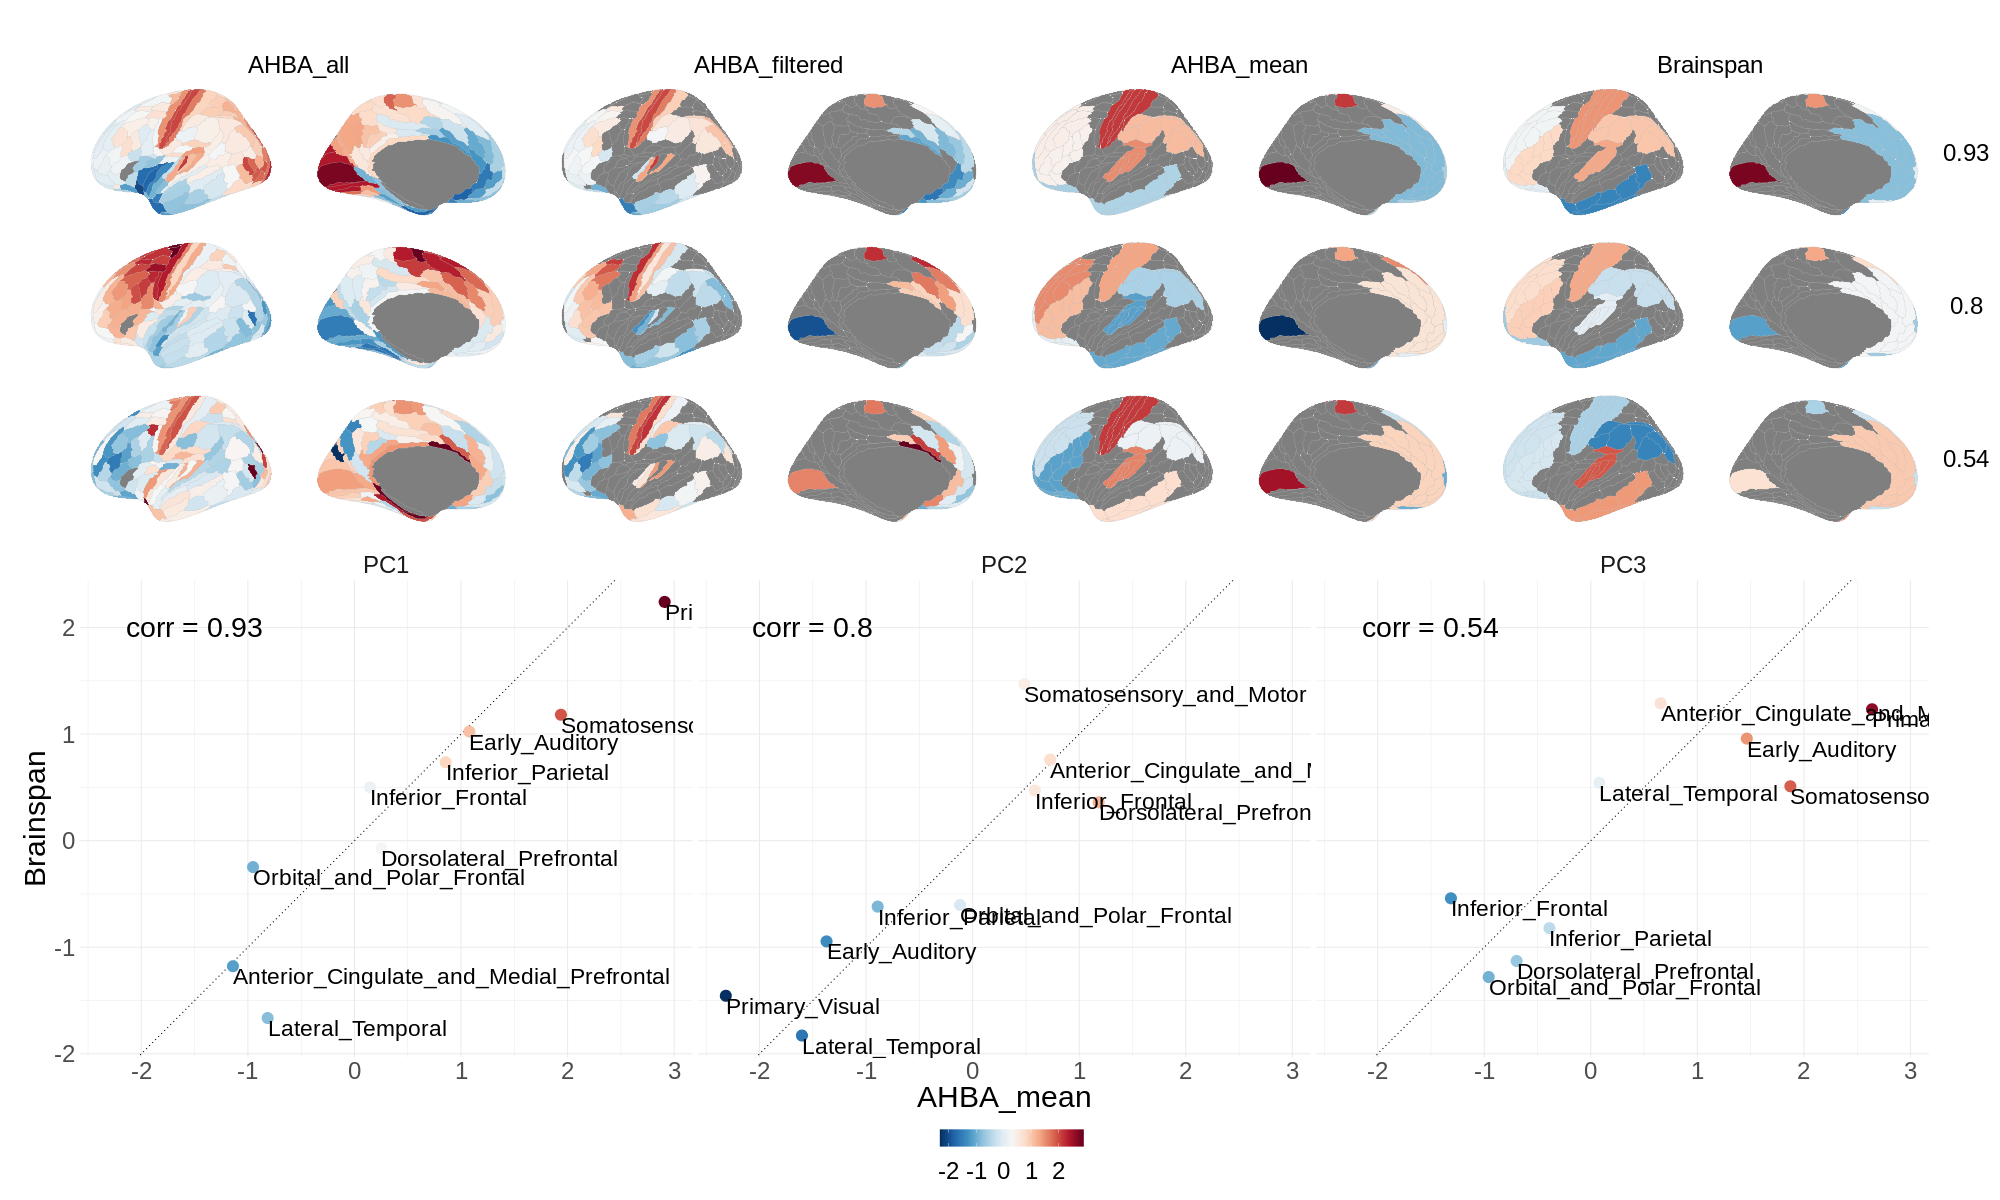

In [751]:
%%R -i hcp_scores -i corrs -w 2000 -h 1200
source("../code/brainspan.R")
g1 <- plot_ahba_bs_brains(hcp_scores, corrs)
g2 <- plot_ahba_bs_scatter(cortex_scores, corrs)
g1 / g2

## Regional correlations of excluded genes?

First make function that correlates all the genes with the PCs

In [29]:
def correlate_genes_pcs(pc_scores, gene_expression):
    df = pd.concat([pc_scores, gene_expression], axis=1).dropna() # using base creates NA rows
    corr = np.corrcoef(df.values, rowvar=False) # do correlation in numpy
    out = pd.DataFrame(corr, columns=df.columns).iloc[:5,5:] # format output
    return out

Then get the correlation of all genes with the PCs for each DS filter, first from the same expression matrix, then from the base expression matrix

In [30]:
for name, version in hcp_ds_versions.items():
    version.gene_corr_self = correlate_genes_pcs(
        version.scores, version.expression.iloc[:,:]) # corr self genes with self PCs
    version.gene_corr_base = correlate_genes_pcs(
        version.scores, hcp_base.expression.iloc[:,:]) # corr all genes with self PCs
    print(f'Correlated genes with PCs for {name}')

Correlated genes with PCs for DS 0.5 (8.0k genes)
Correlated genes with PCs for DS 0.6 (6.4k genes)
Correlated genes with PCs for DS 0.7 (4.8k genes)
Correlated genes with PCs for DS 0.8 (3.2k genes)
Correlated genes with PCs for DS 0.9 (1.6k genes)


Separate the base matrix into included and excluded genes, combine into one df

In [31]:
for name, version in hcp_ds_versions.items():
    included = version.gene_corr_base.columns.intersection(version.coefs.columns)
    excluded = version.gene_corr_base.columns.difference(version.coefs.columns)
    version.gene_corr_inc = version.gene_corr_base.loc[:, included]
    version.gene_corr_exc = version.gene_corr_base.loc[:, excluded]

    version.gene_corr_split = (pd.concat({
        'self': version.gene_corr_self.T,
        'included': version.gene_corr_inc.T,
        'excluded': version.gene_corr_exc.T
    })
     .iloc[:, :3]
     .reset_index(level=0)
     .set_axis(['type'] + [f'PC{i+1}' for i in range(3)], axis=1)
    )    
    
hcp_3donors_ds5.gene_corr_split.head()

type       PC1       PC2       PC3
A1BG      self -0.791066 -0.144869  0.053260
A1BG-AS1  self -0.621560 -0.103477 -0.312323
AAAS      self  0.608615  0.218765  0.042873
AAED1     self -0.721398  0.007776  0.233313
AAGAB     self -0.270646  0.446661 -0.512720

Combine all versions and format for plotting

In [32]:
df = (pd.concat({
    name:version.gene_corr_split for name, version in hcp_ds_versions.items()
})
 .reset_index(level=0)
 .melt(id_vars=['level_0', 'type'])
 .set_axis(['version', 'type', 'component', 'corr'], axis=1)
)
df.head()

version  type component      corr
0  DS 0.5 (8.0k genes)  self       PC1 -0.791066
1  DS 0.5 (8.0k genes)  self       PC1 -0.621560
2  DS 0.5 (8.0k genes)  self       PC1  0.608615
3  DS 0.5 (8.0k genes)  self       PC1 -0.721398
4  DS 0.5 (8.0k genes)  self       PC1 -0.270646

In [33]:
abs_mean = (df
 .assign(corr = lambda x: x['corr'].abs())
 .groupby(['version', 'type', 'component'])
 .mean()
 .reset_index()
 .assign(position = lambda x: x['type'].map({'self':-0.8, 'included':0, 'excluded':0.8}))
)
abs_mean.head()

version      type component      corr  position
0  DS 0.5 (8.0k genes)  excluded       PC1  0.239066       0.8
1  DS 0.5 (8.0k genes)  excluded       PC2  0.199866       0.8
2  DS 0.5 (8.0k genes)  excluded       PC3  0.219587       0.8
3  DS 0.5 (8.0k genes)  included       PC1  0.540706       0.0
4  DS 0.5 (8.0k genes)  included       PC2  0.264554       0.0

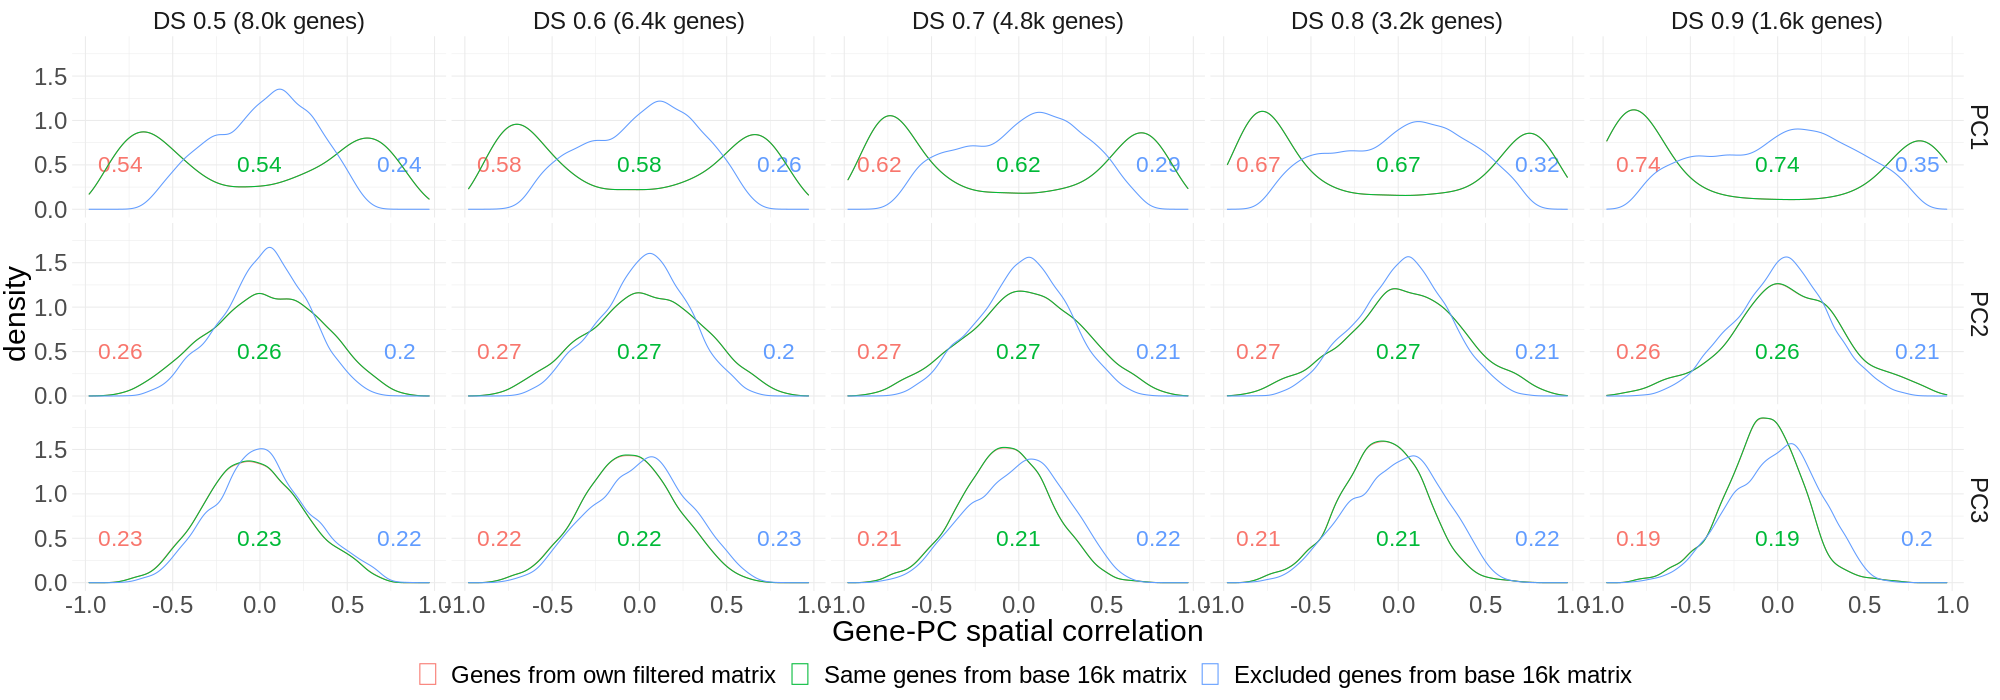

In [34]:
%%R -i df -i abs_mean -w 2000 -h 700
df <- df %>% 
mutate(type = factor(type, 
                     levels=c('self', 'included', 'excluded'), 
                     labels=c('Genes from own filtered matrix',
                              'Same genes from base 16k matrix',
                              'Excluded genes from base 16k matrix')
                    )
      )

abs_mean <- abs_mean %>%
mutate(type = factor(type, 
                     levels=c('self', 'included', 'excluded'), 
                     labels=c('Genes from own filtered matrix',
                              'Same genes from base 16k matrix',
                              'Excluded genes from base 16k matrix')
                    )
      )

ggplot(df) + 
facet_grid(component ~ version) + 
geom_text(data=abs_mean, aes(label=round(corr, 2), x=position, group=type, color=type), 
          y=0.5, size=8, show.legend = FALSE) +
geom_density(aes(x=corr, color=type)) +
xlab('Gene-PC spatial correlation') +
guides(color=guide_legend(title='')) +
theme_minimal() +
theme(text=element_text(size=30), legend.position='bottom')